In [1]:
import glob
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [2]:
path_names=[]
for path in os.listdir("test_voyelles"):
    path_names.append(path)

test=[]   
for file in path_names:
    a=np.loadtxt("test_voyelles/"+file, dtype='int', delimiter='\t')
    test.append(a)
    
test_voy = np.asarray(test)

In [3]:
path_names_train=[]
for path in os.listdir("train_voyelles"):
    path_names_train.append(path)

train=[]   
for file in path_names_train:
    b=np.genfromtxt("train_voyelles/"+file, dtype='int', delimiter='\t')
    train.append(b)
    
train_voy = np.asarray(train)

In [4]:
train_lab = np.loadtxt("train_labels.txt",dtype=str)
test_lab = np.loadtxt("test_labels.txt",dtype=str)

In [5]:
train_voy=train_voy / 255.0
test_voy = test_voy / 255.0

In [6]:
train_lab_num = [0 if voy == 'A' else 1 if voy == 'E' else 2 if voy == 'I' else 3 if voy == 'O' else 4 for voy in train_lab]
test_lab_num = [0 if voy == 'A' else 1 if voy == 'E' else 2 if voy == 'I' else 3 if voy == 'O' else 4 for voy in test_lab]

In [7]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(18,18,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 64)                0

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
history = model.fit(train_voy, np.asarray((train_lab_num)), epochs=10,
                    validation_data=(test_voy, np.asarray((test_lab_num))))

Epoch 1/10
141/141 [==============================] - 2s 8ms/step - loss: 0.8744 - accuracy: 0.7029 - val_loss: 0.2902 - val_accuracy: 0.9040
Epoch 2/10
141/141 [==============================] - 1s 7ms/step - loss: 0.1638 - accuracy: 0.9487 - val_loss: 0.0930 - val_accuracy: 0.9740
Epoch 3/10
141/141 [==============================] - 1s 7ms/step - loss: 0.0846 - accuracy: 0.9740 - val_loss: 0.0835 - val_accuracy: 0.9780
Epoch 4/10
141/141 [==============================] - 1s 7ms/step - loss: 0.0631 - accuracy: 0.9824 - val_loss: 0.0581 - val_accuracy: 0.9840
Epoch 5/10
141/141 [==============================] - 1s 7ms/step - loss: 0.0524 - accuracy: 0.9833 - val_loss: 0.0611 - val_accuracy: 0.9820
Epoch 6/10
141/141 [==============================] - 1s 7ms/step - loss: 0.0467 - accuracy: 0.9876 - val_loss: 0.0341 - val_accuracy: 0.9860
Epoch 7/10
141/141 [==============================] - 1s 7ms/step - loss: 0.0351 - accuracy: 0.9887 - val_loss: 0.0487 - val_accuracy: 0.9860
Epoch 

16/16 - 0s - loss: 0.0344 - accuracy: 0.9880 - 64ms/epoch - 4ms/step


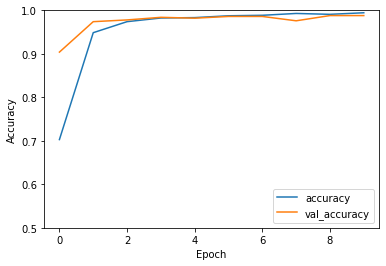

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_voy,  np.asarray((test_lab_num)), verbose=2)

In [13]:
print(test_acc)

0.9879999756813049


In [14]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [15]:
predictions = probability_model.predict(test_voy)

In [16]:
np.argmax(predictions[0])

2

In [17]:
train_labels = ['A', 'E', 'I', 'O', 'U'] 
voy_pred=[]
for preds in predictions:
    li=np.argmax(preds)
    lab=train_labels[li]
    voy_pred.append(lab)

In [18]:
print(classification_report(test_lab, voy_pred))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       105
           E       0.97      0.99      0.98       108
           I       1.00      0.97      0.98        92
           O       1.00      0.99      1.00       108
           U       0.98      1.00      0.99        87

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



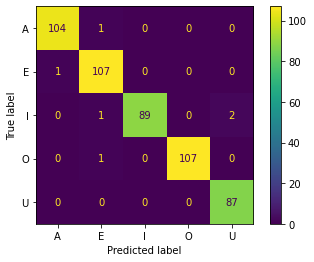

In [19]:
conf_mat_cnn = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_lab, voy_pred, labels=['A','E','I','O','U']), display_labels=['A','E','I','O','U'])
conf_mat_cnn.plot()

In [20]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(train_labels[predicted_label],
                                100*np.max(predictions_array),
                                train_labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

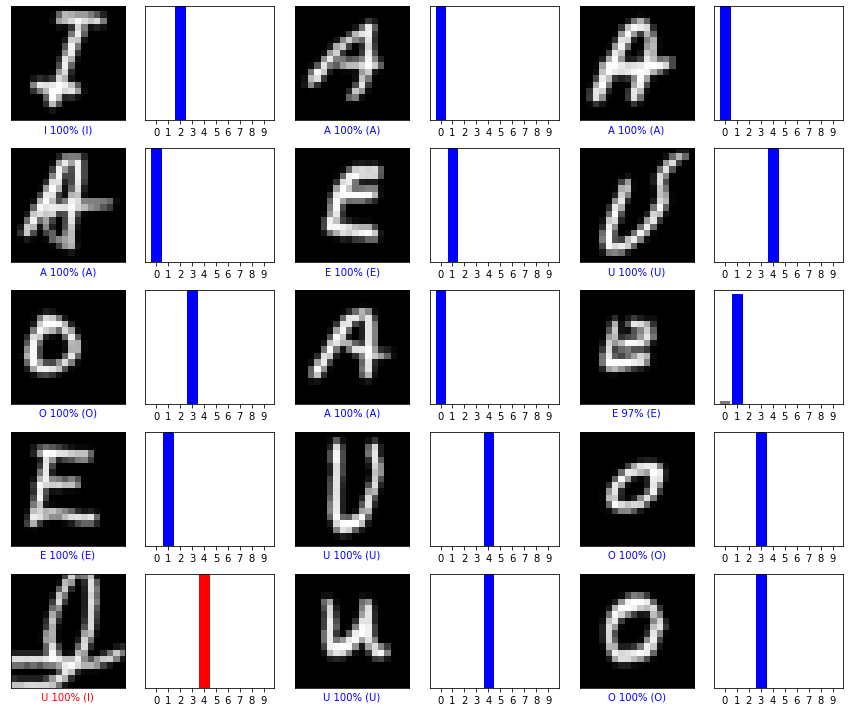

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_lab_num, test_voy)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_lab_num)
plt.tight_layout()
plt.show()

In [22]:
errors=[]
for i in range(len(test_lab)):
    if test_lab[i] != voy_pred[i]:
        errors.append(i)
errors[0:2]

[12, 331]

TRUE :  I
PRED:  U


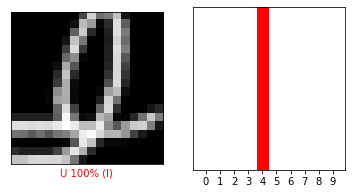

TRUE :  O
PRED:  E


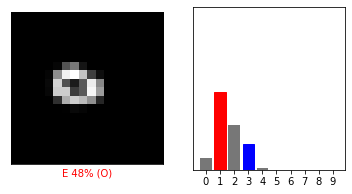

In [24]:
#two errors
print("TRUE : ", test_lab[12])
print("PRED: ", voy_pred[12])
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_lab_num, test_voy)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_lab_num)
plt.show()

print("TRUE : ", test_lab[331])
print("PRED: ", voy_pred[331])
i = 331
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_lab_num, test_voy)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_lab_num)
plt.show()